In [4]:
import pandas as pd
import numpy as np
from scipy import stats

# Amostragem e Medidas de Centralidade e Variabilidade - Python

### A amostra é parte de uma população, selecionada randomicamente, que forma o conjunto de elementos que esta sendo estudado. 
* População: todo o alvo de um estudo 
* Amostra: subconjunto da população
* Censo: pesquisa com toda a população

<strong>Quando feita corretamente, a amostra preserva as mesmas características da população de onde foi retirada, caso contrário ela poderá estar enviesada.</strong>
#### Viés: subestima ou superestimação da população.
* Pesquisa de elementos de fácil acesso
* Pesquisas pela Internet (contando com pessoas que possuiem interesse na pesquisa)
* Sem utilização mecanismos de seleção aleatória

#### Custo/Benefício de uma Amostra: vantagem de não trabalhar com toda a população, poupando recursos e agilizando a captação dos dados.

### Amostra Aleatória Simples: 
Determinado número de elementos é retirado da população de forma aleatória, onde qualquer elemento possui a mesma chance de ser selecionado.
* Com reposição
* Sem reposição

### Banco de Dados = Íris


In [5]:
from sklearn.datasets import load_iris
data = load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris['species'] = pd.Categorical.from_codes(data.target, data.target_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
## Instancias e Atributos do DB/Íris
print('Instâncias: {} \nAtributos: {}'.format(iris.shape[0], iris.shape[1]))

Instâncias: 150 
Atributos: 5


In [7]:
## Gerando dados aleatórios para compor a amostra com função random.choice do Numpy
#np.random.seed(2345)
amostra = np.random.choice(a = [0,1], size = 150, replace=True, p = [0.5, 0.5])
print(amostra)

[1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0
 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1
 0 1]


In [8]:
len(amostra)

150

In [9]:
len(amostra[amostra == 1])

80

In [10]:
len(amostra[amostra == 0])

70

In [11]:
##Utilizando sample
#amostra probabilística simples sem repetição com 150 unidades
amostrasample = iris.sample(150)
amostrasample.shape

(150, 5)

In [12]:
#amostra probabilística simples com repetição com sim unidades
amostrarep = iris.sample(150, replace=True)
amostrarep.shape


(150, 5)

### Amostra Estratificada:
A população é dividida em características comuns: escolaridade, gênero, raça, idade, etc. É interessante ter um número representativo de cada grupo representativo.

In [13]:
#Contagem dos atributos Íris
iris['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [14]:
## Gerar amostra com 25 elementos de cada espécie, escolidos aleatóriamente ccom biblioteca 'sklearn'
from sklearn.model_selection import train_test_split
x, _, y, _ = train_test_split(iris.iloc[:, 0:4], iris.iloc[:, 4],
                             test_size = 0.5, stratify = iris.iloc[:,4])

In [15]:
len(x), len(y)

(75, 75)

In [16]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
133,6.3,2.8,5.1,1.5
3,4.6,3.1,1.5,0.2
87,6.3,2.3,4.4,1.3
137,6.4,3.1,5.5,1.8
83,6.0,2.7,5.1,1.6


In [17]:
y.head()

133     virginica
3          setosa
87     versicolor
137     virginica
83     versicolor
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [18]:
y.value_counts()

virginica     25
versicolor    25
setosa        25
Name: species, dtype: int64

### 2.1 Amostra estratificada proporcional à variável Categórica
### DB: Infert

In [19]:
##Gerando amostra proporcionalmente com DB Infert 
infert = pd.read_csv('datasets/infert.csv')


In [20]:
infert.head()

,Unnamed: 0,education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
0,1,0-5yrs,26,6,1,1,2,1,3
1,2,0-5yrs,42,1,1,1,0,2,1
2,3,0-5yrs,39,6,2,1,0,3,4
3,4,0-5yrs,34,4,2,1,0,4,2
4,5,6-11yrs,35,3,1,1,1,5,32


In [21]:
## Instancias e Atributos do DB/infert
print('Instâncias: {} \nAtributos: {}'.format(infert.shape[0], infert.shape[1]))

Instâncias: 248 
Atributos: 9


In [22]:
infert['education'].value_counts()

6-11yrs    120
12+ yrs    116
0-5yrs      12
Name: education, dtype: int64

In [23]:
#Cálculo: número do estrato / tamanho da população * número da amóstra
# 0-5:
v1 = round(12/248 * 100)
# 6-11:
v2 = round(120/248 * 100)
#12+:
v3 = round(116/248 * 100)

print('Proporções das variáveis categóricas na amostra:\n-0-5 anos: {} \n-6-11 anos: {} \n-12+: {}'.format(v1, v2, v3))

Proporções das variáveis categóricas na amostra:
-0-5 anos: 5 
-6-11 anos: 48 
-12+: 47


In [24]:
x1, _, y1, _ = train_test_split(infert.iloc[:, 2:9], infert.iloc[:,1],
                               test_size=0.6, stratify = infert.iloc[:,1]) 

In [25]:
y1.value_counts()

6-11yrs    48
12+ yrs    46
0-5yrs      5
Name: education, dtype: int64

### Amostra Sistemática:
É selecionado um elemento aleatório para então, a cada 'n' elementos, um novo menbro ser escolhido. Bem utilizado quando não se sabe a quantidade de elementos existem na população.

In [26]:
from math import ceil

In [27]:
populacao = 150
amost = 15
k = ceil(populacao/amost)

In [28]:
r = np.random.randint(low = 1, high = k + 1, size = 1)
r

array([10])

In [35]:
acumulador = r[0]
sort = []
for i in range(amost):
    #print(acumulador)
    sort.append(acumulador)
    acumulador += k

In [36]:
sort

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

In [37]:
# Gerando um vetor de posicoes que inicia em 0 e termina em 150 com um intervalo de 100:
from random import randint
indices = np.arange(0,150, randint(0, 10))
amostrasist2 = iris.loc[indices]

In [38]:
amostrasist2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
12,4.8,3.0,1.4,0.1,setosa
18,5.7,3.8,1.7,0.3,setosa
24,4.8,3.4,1.9,0.2,setosa
30,4.8,3.1,1.6,0.2,setosa
36,5.5,3.5,1.3,0.2,setosa
42,4.4,3.2,1.3,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
54,6.5,2.8,4.6,1.5,versicolor


# Medidas de Centralidade e Variabilidade

* µ = média da população = Σx/N -> trata-se de um parâmetro populacional
* X = média da amostra   = Σx/n -> trata-se de uma estatística amostral
* Moda = Valor mais frequente/comum
* Mediana: Valor que separa a metade maior da metade menor de uma amostra ou população
* Amplitude: Diferença entre o maior e o menor valor na amostra ou população.
* σ^2 = Variância Populacional = Σ(xi-X)^2/N -> média dos quadrados das diferenças entre cada elemento e a média da população. Indica a dispersão dos dados em relação à média.
* S^2 = Variância Amostral = Σ(xi-X)^2/(n-1) -> Estimativa não viciada: média dos quadrados das diferenças entre cada elemento e a média da da amóstra menos 1. O resultado é um número maior que o da Variância Populacional.
* σ = Desvio Padrão 
* FIQ = Intervalo Interquartil = 3Q - 1Q


<strong>Quartis:</strong>
* Q1: 25% dos menores valores
* Q2: 50% dos valores (mediana)
* Q3: 75% dos maiores valores

In [39]:
# Medidas de Centralidade e Variabilidade em Python
salarios = [
    40000,
    18000,
    12000,
    250000,
    30000,
    140000,
    300000,
    40000,
    800000
]
#Média
x = np.mean(salarios)
print('A média dos salários é: {}'.format(x))
#Mediana 
ma = np.median(salarios)
print('A mediana dos salários é: {}'.format(ma))
#quartis
quartis = np.quantile(salarios, [0.25, 0.50, 0.75])
print('O primeiro quartil é: {}, \nO segundo quartil é: {}, \nO terceiro quartil é: {}'.format(quartis[0], quartis[1], quartis[2]))
#Desvio Padrão
dp = np.std(salarios, ddof = 1)
print('O Desvio Padrão é: {}'.format(dp))

A média dos salários é: 181111.11111111112
A mediana dos salários é: 40000.0
O primeiro quartil é: 30000.0, 
O segundo quartil é: 40000.0, 
O terceiro quartil é: 250000.0
O Desvio Padrão é: 255307.87514511007


In [40]:
#Visualização com Describe
stats.describe(salarios)

DescribeResult(nobs=9, minmax=(12000, 800000), mean=181111.11111111112, variance=65182111111.11111, skewness=1.758635899846188, kurtosis=1.9572075427527729)

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

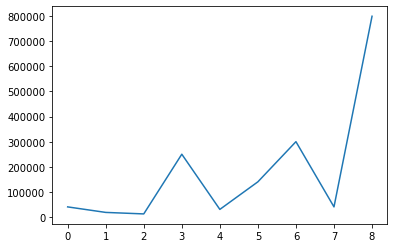

In [46]:
plt.plot(salarios)

{'whiskers': [<matplotlib.lines.Line2D at 0xb344910>,
 'caps': [<matplotlib.lines.Line2D at 0xb344fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0xb3445b0>],
 'medians': [<matplotlib.lines.Line2D at 0xb3536d0>],
 'fliers': [<matplotlib.lines.Line2D at 0xb3539d0>],
 'means': []}

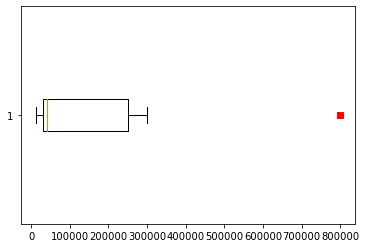

In [44]:
plt.boxplot(salarios, 0, 'rs', 0)